## This is the softmax workbook for ECE 239AS Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a softmax classifier.

In [176]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    # Set the path to the CIFAR-10 data
    import os
    cur_dir = os.getcwd()
    cifar10_dir = cur_dir+'/cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)    
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [178]:
from nndl import Softmax

In [179]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [180]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [181]:
print(X_train.shape)
print("Loss: ", loss)

(49000, 3073)
Loss:  2.3277607028


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this value make sense?

## Answer:

Without training, the softmax classifier was initialized with random weights. From initializaiton, it essentially acts as a random classifier. We expect a random clssifier to do slightly worse than 50% in terms of accuracy. Assuming that this classifier did slightly worse than 50%, 24500 or more training exmaples would be classified incorrectly. These would take on variable ranges depending on the degree of the misclassification. This error is then normalized by the number of training examples, so for each training example we incur a loss of about 2.32. This number is being inflated by improperly classified points at extreme distances (due to hinge loss penalty). It is not closer to 0 because a correct classification has no bonus, since it is max(0, hinge_penalty).

#### Softmax gradient

In [182]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: 0.684953 analytic: 0.684953, relative error: 5.867046e-09
numerical: 1.251212 analytic: 1.251212, relative error: 2.058286e-08
numerical: 1.225199 analytic: 1.225199, relative error: 1.059550e-08
numerical: 3.011935 analytic: 3.011935, relative error: 6.940156e-09
numerical: 0.903300 analytic: 0.903300, relative error: 4.877627e-08
numerical: -0.221147 analytic: -0.221148, relative error: 2.190131e-07
numerical: 1.124273 analytic: 1.124273, relative error: 3.960280e-08
numerical: -1.214810 analytic: -1.214810, relative error: 2.342095e-10
numerical: -1.754822 analytic: -1.754822, relative error: 7.381466e-09
numerical: -3.909095 analytic: -3.909095, relative error: 9.820295e-09


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [183]:
import time

In [184]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.316697106110442 / 321.1638255742149 computed in 0.08814406394958496s
Vectorized loss / grad: 2.316697106110443 / 321.1638255742149 computed in 0.008970022201538086s
difference in loss / grad: -8.881784197001252e-16 /2.1609419937285767e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

## Question:

How should the softmax gradient descent training step differ from the svm training step, if at all?

## Answer:

The training steps for softmax gradient descent and svm are the same, but the cost functions differ. The SGD steps are the exact same.

iteration 0 / 1500: loss 2.3365926606637544
iteration 100 / 1500: loss 2.0557222613850827
iteration 200 / 1500: loss 2.0357745120662813
iteration 300 / 1500: loss 1.9813348165609888
iteration 400 / 1500: loss 1.9583142443981612
iteration 500 / 1500: loss 1.8622653073541355
iteration 600 / 1500: loss 1.8532611454359382
iteration 700 / 1500: loss 1.8353062223725827
iteration 800 / 1500: loss 1.8293892468827635
iteration 900 / 1500: loss 1.899215853035748
iteration 1000 / 1500: loss 1.97835035402523
iteration 1100 / 1500: loss 1.8470797913532633
iteration 1200 / 1500: loss 1.8411450268664082
iteration 1300 / 1500: loss 1.7910402495792102
iteration 1400 / 1500: loss 1.8705803029382257
That took 5.789475917816162s


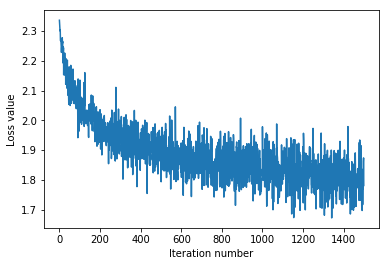

In [185]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [186]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.3811428571428571
validation accuracy: 0.398


## Optimize the softmax classifier

You may copy and paste your optimization code from the SVM here.

In [187]:
np.finfo(float).eps

2.2204460492503131e-16

In [188]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #
def sweep_lr(num_iters):
    learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 
                     1e4, 1e5, 1e6]

    results = {}
    for lr in learning_rates:
        np.random.seed(1)

        num_classes = len(np.unique(y_train))
        num_features = X_train.shape[1]

        softmax = Softmax(dims=[num_classes, num_features])

        loss_hist = softmax.train(X_train, y_train, learning_rate=lr,
                          num_iters=num_iters, verbose=False)

        y_val_pred = softmax.predict(X_val)
        val_accuracy = np.mean(np.equal(y_val, y_val_pred))
        results[lr] = val_accuracy 

    return results


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


For max_iters=1500, the best learning rate in the set ranging from 1e-6 to 1e6 by orders of magnitude is 1e-6. The associated accuracy is 0.415

In [189]:
results = sweep_lr(num_iters=1500)
max_acc = 0
best_lr = -1
for key, value in results.items():
    if(value > max_acc):
        max_acc = value
        best_lr = key

print(results)
print("Best learning rate is: ", best_lr)
print("Accuracy is: ", max_acc )

{1e-06: 0.41499999999999998, 1e-05: 0.315, 0.0001: 0.28399999999999997, 0.001: 0.086999999999999994, 0.01: 0.086999999999999994, 0.1: 0.086999999999999994, 1.0: 0.086999999999999994, 10.0: 0.086999999999999994, 100.0: 0.086999999999999994, 1000.0: 0.086999999999999994, 10000.0: 0.086999999999999994, 100000.0: 0.086999999999999994, 1000000.0: 0.086999999999999994}
Best learning rate is:  1e-06
Accuracy is:  0.415
